<a href="https://colab.research.google.com/github/CamiloM21/ClasesCamiloMunoz/blob/master/Clases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASE 2.

algoritmos de caja blanca y algoritmos caja negra: arboles de decision
Un arbol de decision claisifca una observacion siguiendo una serie de divisiones binarias basadas en las caracteristicas de la muestra, el arbol comienza en un nodo raiz, donde se evaluan las caracterisiticas. este proceso continua hasta llegar a un nodo terminal, que es el que asigna una clase a la observacion.
#metodos para seleccionar las divisiones
gini impurity: mide la impureza de un nodo, cuanto menor sea la impuerza, mas homogenea sera la clase de ese nodo.
-Entropia(cruzada de shanon):La entropia mide la cantidad de desorden o incertidumbre de una division. la idea es reducir la entropia de un conjunto de datos mediante la division en nodos mas homogeneos.
-indice de gini vs entropia: Ambos se utilizan para elegir el mejor punto de corte,aunque el indice de gini es mas popular debido a su simplicidad y rapidez computancional. Sin embargo, la entropia tiende a ser mas informativa en divisiones con muchas clases.

**no hacer proyectos con arboles de decision porque tienden a sobreentrenarse**
otras opciones es en  Gradient Boosting, aprende del anterior arbol y no repite datos.
 Gradient Boosting es bueno, tiene mas precision
 **XGBOOST (xtreme gratiang boosting)**
11.2.2 Ventajas de los árboles de decisión para clasificación
Interpretabilidad: Los árboles de decisión son modelos muy fáciles de interpretar y visualizar. Cada nodo y rama representan una regla de decisión que puede explicarse fácilmente.
No requieren normalización de los datos: A diferencia de otros modelos como las máquinas de soporte vectorial (SVM) o las regresiones lineales, los árboles de decisión no requieren que los datos sean normalizados o estandarizados.
Manejo de datos categóricos y numéricos: Los árboles pueden manejar tanto variables numéricas como categóricas sin necesidad de transformarlas (por ejemplo, a variables dummy).
Resistencia a los valores atípicos: Los árboles no se ven muy afectados por outliers, ya que los puntos extremos no suelen influir en el valor de la división.
Automática selección de variables importantes: Los árboles de decisión pueden identificar qué variables son más relevantes para la clasificación.
11.2.3 Desventajas de los árboles de decisión para clasificación
Overfitting: Los árboles de decisión tienden a sobreajustarse a los datos de entrenamiento, especialmente cuando se permiten árboles muy profundos. Esto se debe a que pueden aprender detalles muy específicos que no generalizan bien a nuevos datos.
Inestabilidad: Un pequeño cambio en los datos de entrenamiento puede llevar a una estructura de árbol completamente diferente.
Modelo sesgado en clases desbalanceadas: Si los datos están desbalanceados, el árbol puede predecir predominantemente la clase mayoritaria.
11.2.4 Estrategias para evitar el overfitting
Existen varias técnicas que se pueden aplicar para reducir el sobreajuste en árboles de decisión:

Poda (Pruning): La poda elimina ramas del árbol que tienen poca importancia o que sobreajustan los datos. Se pueden usar métodos como el Cost Complexity Pruning para realizar una poda que elimine ramas que no mejoren significativamente la precisión del modelo.
Limitación de la profundidad del árbol: Limitar la profundidad máxima del árbol es una forma sencilla de evitar que el árbol crezca demasiado, lo que podría llevar a un sobreajuste.
Mínimo número de muestras por hoja: Establecer un número mínimo de observaciones para permitir una división en cada nodo o para que un nodo sea terminal puede ayudar a evitar divisiones demasiado específicas.
Métodos de ensamblaje: Técnicas como Random Forest y Gradient Boosting combinan múltiples árboles de decisión para mejorar la robustez y reducir el riesgo de sobreajuste.





elegir nodos de un arbol de decision:
impureza: cuando el nodo no tiene datos de una sola clase
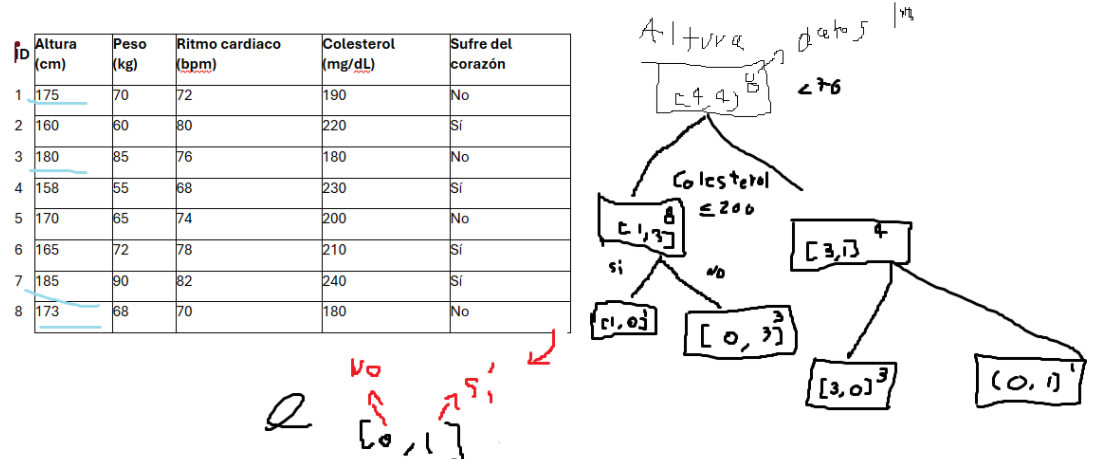

podar: pruning es quitar las ramas que no mejoran el rendimiento del modelo, para evitar que se sobreentrene es mejor podar
calcular el gini esta en word 😊
criterion“gini”, “entropy”, “log_loss

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


# Crear el conjunto de datos
data = {
    "Horas de Estudio": ["Alta", "Baja", "Baja", "Alta", "Alta","Baja", "Alta", ],
    "Asistencia": ["Buena", "Buena", "Mala", "Mala", "Buena","Buena", "Mala",],
    "Resultado": ["Sí", "No", "No", "Sí", "Sí","No", "No",]
}

df = pd.DataFrame(data)
df

,Horas de Estudio,Asistencia,Resultado
0,Alta,Buena,Sí
1,Baja,Buena,No
2,Baja,Mala,No
3,Alta,Mala,Sí
4,Alta,Buena,Sí
5,Baja,Buena,No
6,Alta,Mala,No


In [ ]:
# Codificar variables categóricas a numéricas
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)

# Separar características y etiqueta
X = df_encoded[["Horas de Estudio", "Asistencia"]]
y = df_encoded["Resultado"]


#Dado que son muy pocos datos no vamos a dividir en entrenamiento y pruebas, usaremos la data tanto para entrenar como para probar.


In [ ]:
# Crear el modelo de Árbol de Decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Hacer predicciones
y_pred = tree_clf.predict(X)

# Evaluación del modelo
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)


In [ ]:
# Imprimir los resultados
print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)

Precisión del modelo: 0.8571428571428571
Matriz de confusión:
 [[4 0]
 [1 2]]


In [ ]:
# Verificar si hay más de una clase en y_test para calcular el ROC AUC
if len(np.unique(y)) > 1:
    roc_auc = roc_auc_score(y, tree_clf.predict_proba(X)[:, 1])
else:
    roc_auc = "No se puede calcular ROC AUC (solo una clase en y_test)"


print("Área bajo la curva ROC:", roc_auc)

Área bajo la curva ROC: 0.9583333333333333


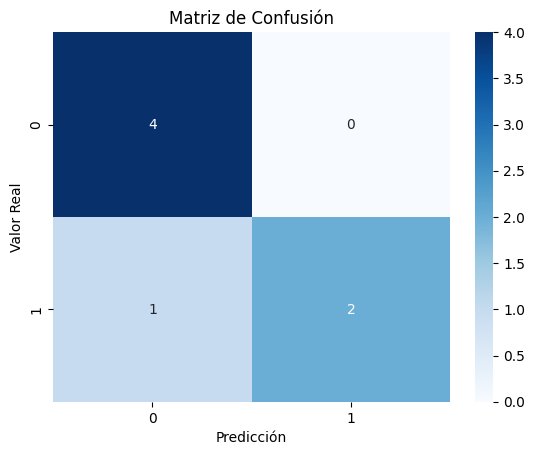

In [ ]:
#Grafique la matriz confusión en mapa de calor con seaborn
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

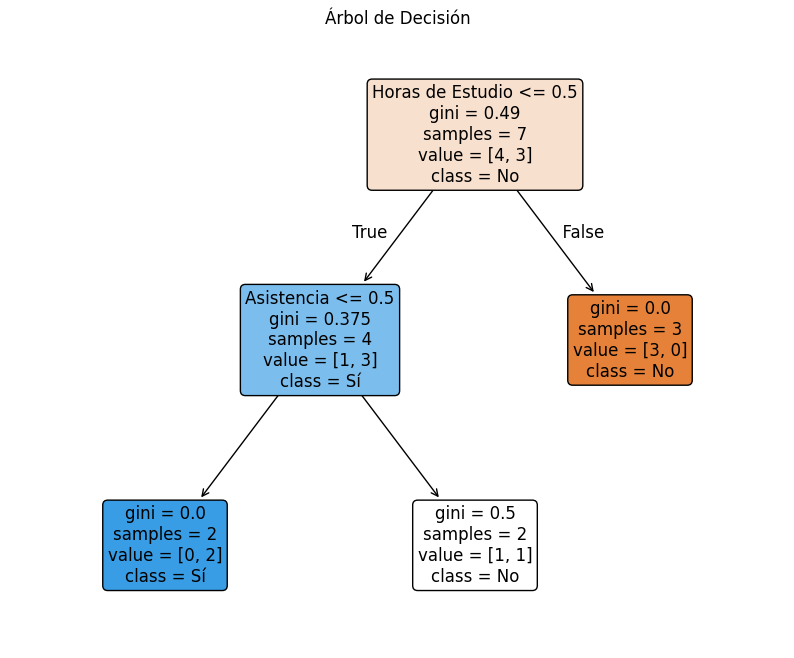

In [ ]:
# Graficar el árbol de decisión
plt.figure(figsize=(10, 8))
plot_tree(tree_clf, filled=True, feature_names=["Horas de Estudio", "Asistencia"], class_names=["No", "Sí"], rounded=True, fontsize=12)
plt.title("Árbol de Decisión")
plt.show()


la viable del nodo raiz se escoge con el gini mas alto criterio de division.


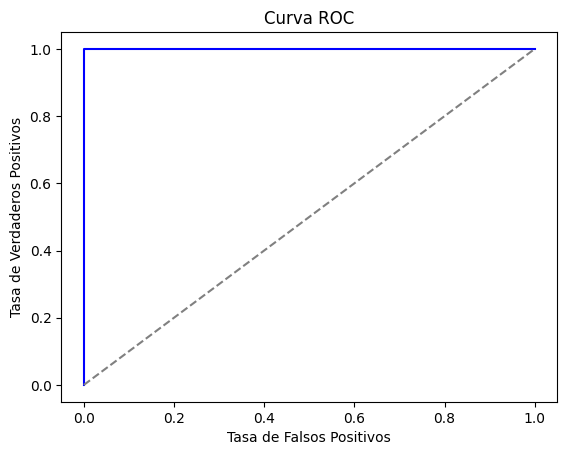

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, tree_clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()


elif5 se usa para mostrar el arbol y explicarlo de manera muy clara